# Clean up the mol2 file 
<b style="font-size:20px">With xxxxxx.mol2 as input:<br>
It automatically outputs the xxxxxx_clean.mol2 and xxxxxx.sdf;</b>
<br>
<code><b style="font-size:20px">molfile = "./PaIVKLkS/PaIVKLkS_SEEDdock.mol2"  # absolute path</b>
<b style="color:green;font-size:20px">Doana.utils.clean_mol2(molfile)</b></code>

In [2]:
import Doana 
# absolute path
molfile = "/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.mol2" 
Doana.utils.clean_mol2(molfile)


Running the clean mol2 file function


*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond


Found the sdf output;


571 molecules converted


'/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.sdf'

<h1>PLIF Generator</h1>

In [3]:
# import Doana
from Doana import analysis

parmdic = {
  'reflig'     : "/home/miemie/storage/WDRed/project_METTL1/Tim_Ruth_docking/Dockings_Tim/SEED1_WfOJXBzX/tmp_Sampling_target.sdf",
  'profile'    : "/home/miemie/storage/WDRed/project_METTL1/Tim_Ruth_docking/Dockings_Tim/SEED1_WfOJXBzX/tmp_Sampling_targetalteredh.pdb",
  
  'resultmols' : "/home/miemie/storage/WDRed/project_METTL1/Tim_Ruth_docking/Dockings_Tim/SEED1_WfOJXBzX/WfOJXBzX.sdf",
  'resultdat'  : "/home/miemie/storage/WDRed/project_METTL1/Tim_Ruth_docking/Dockings_Tim/SEED1_WfOJXBzX/WfOJXBzX.dat",
  # This should be a new file, new execution will overwrite is file
  'outpkl'     : "/tmp/test.pkl",  

  # Should use a python iterable object to define its indexes 
  'onlymols'   : "",
  'type': "seed"
}

# Calculate the overlapping index separately. 
wrapper = analysis.PLIFGen_Dock(parmdic)
# Generate main PLIF
wrapper.gen() 

# Generate extra calculations 
OIdic = wrapper.calc_OI(1.5, printrecords=False)
wrapper.savedata()


Loading receptor PDB structure: /home/miemie/storage/WDRed/project_METTL1/Tim_Ruth_docking/Dockings_Tim/SEED1_WfOJXBzX/tmp_Sampling_targetalteredh.pdb


/home/miemie/miniconda3/envs/prolif/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:315: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


  0%|          | 0/1 [00:00<?, ?it/s]

Reference ligand interactions: ligand          UNL1                                                          \
protein      ASP44.A     GLY46.A             CYS47.A     GLY48.A     GLU69.A   
interaction Cationic Hydrophobic HBDonor Hydrophobic Hydrophobic Hydrophobic   
Frame                                                                          
0               True        True    True        True        True        True   

ligand                                                  ...              \
protein                 ILE70.A    ARG71.A    SER101.A  ...    LEU122.A   
interaction HBDonor Hydrophobic HBAcceptor Hydrophobic  ... Hydrophobic   
Frame                                                   ...               
0              True        True       True        True  ...        True   

ligand                                                               \
protein                PHE123.A    PRO124.A    ASP125.A    PRO126.A   
interaction HBDonor Hydrophobic Hydrophobic Hydrop

  0%|          | 0/2176 [00:00<?, ?it/s]

  0%|          | 0/2176 [00:00<?, ?it/s]

Saved the fingerprint to file: /tmp/test.pkl


<h1>PLIF Reader</h1>

Data set 1
0 ILE45.A_HBDonor 1  | 1 GLY46.A_HBDonor 14  | 2 TYR49.A_PiStacking 1
3 GLU69.A_HBDonor 82  | 4 GLU69.A_Cationic 8  | 5 ILE70.A_HBAcceptor 19
6 ARG71.A_HBDonor 6  | 7 ARG71.A_HBAcceptor 190  | 8 VAL72.A_HBAcceptor 1
9 ASN102.A_HBDonor 64  | 10 ASN102.A_HBAcceptor 125  | 11 ALA103.A_HBDonor 4
12 ALA103.A_HBAcceptor 75  | 13 LYS105.A_HBAcceptor 3  | 14 LEU122.A_HBDonor 6
15 PHE123.A_HBDonor 6  | 16 ASP125.A_HBDonor 13  | 17 ASP125.A_HBAcceptor 117
18 PRO126.A_HBDonor 275  | 19 HID127.A_HBDonor 13  | 20 HID127.A_PiStacking 274
21 PHE128.A_PiStacking 23  | 22 LYS129.A_HBAcceptor 96  | 23 LYS132.A_HBAcceptor 1
24 LYS134.A_HBDonor 45  | 25 LYS134.A_HBAcceptor 7  | 26 TRP135.A_HBAcceptor 205
27 TRP135.A_PiStacking 645  | 28 ARG136.A_HBDonor 3  | 29 ARG136.A_HBAcceptor 367
30 GLU202.A_HBDonor 1  | 31 GLU202.A_HBAcceptor 6  | 32 GLU202.A_Cationic 5
33 Rank	 2176  | 34 seed_total	 2176  | 35 seed_vdw	 2176
36 seed_delec	 2176  | 37 seed_elinw	 2176  | 38 seed_resdes	 2176
39 seed_frag

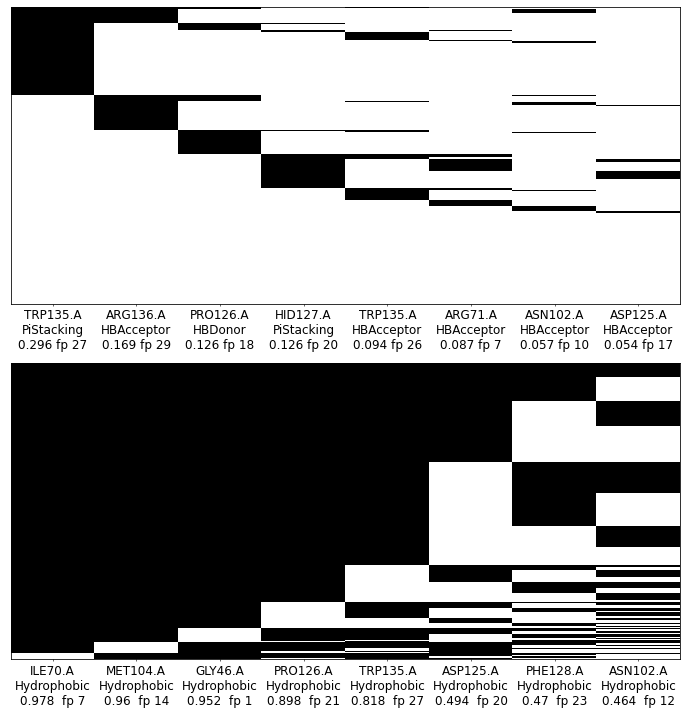

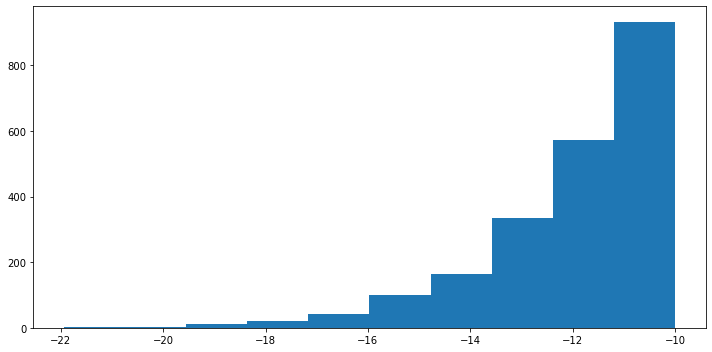

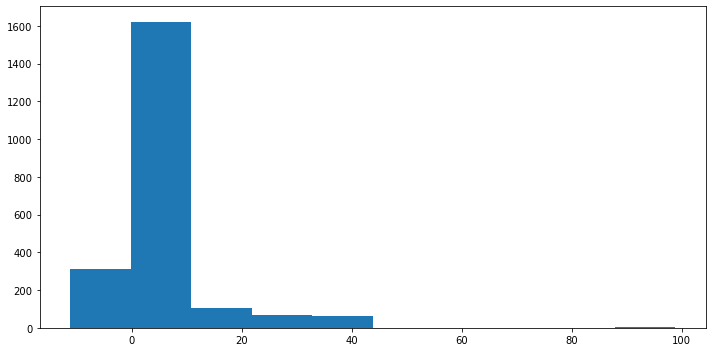

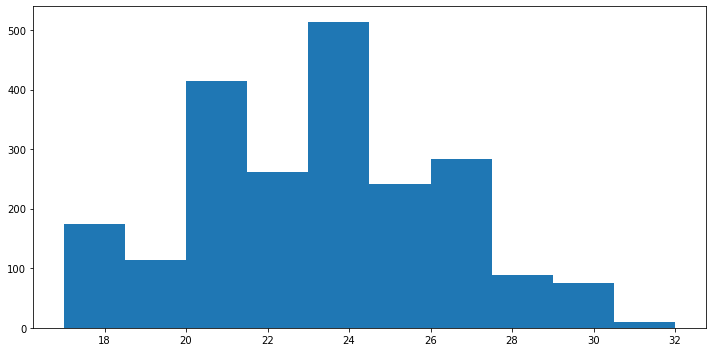

In [2]:
from Doana import analysis
pklfile = "/tmp/test.pkl"
reader = analysis.PLIFRead_Dock(pklfile)
fig, ax  = reader.Docking_prolif(sel_cols="top")

reader.show_cols()

fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata["seed_total"])
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata["seed_delec"])
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHistByCol(reader.fpdata, 41)


[24.43 20.34 16.21 ... 19.56 18.34 20.84]


(array([  3.,  18.,  85., 226., 328., 378., 410., 246., 179., 124.,  80.,
         56.,  25.,  11.,   4.,   1.,   1.,   0.,   0.,   1.]),
 array([11.93  , 13.0855, 14.241 , 15.3965, 16.552 , 17.7075, 18.863 ,
        20.0185, 21.174 , 22.3295, 23.485 , 24.6405, 25.796 , 26.9515,
        28.107 , 29.2625, 30.418 , 31.5735, 32.729 , 33.8845, 35.04  ]),
 <BarContainer object of 20 artists>)

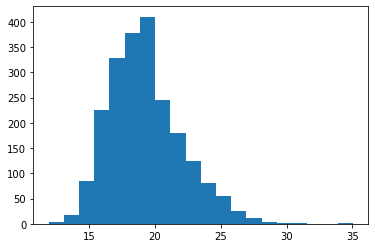

In [16]:
import matplotlib.pyplot as plt; 
reader.fpdata
plt.clf()
# for i, row in reader.fpdata.iterrows():
v_total = reader.fpdata["seed_resdes"].to_numpy().astype(float)
print(v_total)
plt.hist(v_total, bins=20)

# print(row)

# Filter poses 

In [20]:
# Date selection reader.fpdata non-hydrophobic interactions, reader.fpdata2 hydrophobic interactions
datasel = reader.fpdata

# Setup the column indexes
# score_column = len(datasel.columns)-10; 
# seed_vdw_column = len(datasel.columns)-9; 
# rank_column = len(datasel.columns)-11; 
# OI_avg_column    = len(datasel.columns)-3; 
# OI_ref_column    = len(datasel.columns)-2; 
# print(f"Selected columns: {rank_column} {datasel.columns[rank_column][0]}, {seed_vdw_column} {datasel.columns[seed_vdw_column][0]}, {OI_ref_column} {datasel.columns[OI_ref_column][0]}")

# Apply filters 
HBstate  = reader.HBondFilter("ge", 1); 
Sstate   = reader.colFilter(reader.fpdata, 36, "lt", -9); 
# Rstate   = reader.colFilter(reader.fpdata, rank_column, "lt", 1000); 
OIstate  = reader.colFilter(reader.fpdata, 44, "gt", 0.4); 
FPstate  = reader.FPSelectionFilter(reader.fpdata, [33], operator="or"); 

# Combine different filters
filters_states  = [HBstate, Sstate, OIstate, FPstate]; 

intersec = reader.getIntersection(*filters_states); 
posids   = reader.getPOSIDByStatus(intersec); 
reader.getPOSIDQuery(posids); 
print(posids)

print(reader.fpdata.to_numpy()[intersec])
print("var intersec: ", intersec)

Hydrogen Bond Count Selector: 306 poses are kept
Column Value Selector: 47 poses are kept
Column Value Selector: 463 poses are kept
Fingerprint Selector: Using and operator, the poses are kept if they have any of defined fingerprint.
Fingerprint Selector: 68 poses are kept
Intersection Operator: Source from 4 datasets, 4 poses are kept
['345' '482' '506' '464']
[[False True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False True False 345
  '-9.075' '-10.666' '-0.114' '1.592' '345' '22-09-21-00:30:50'
  'V00196B6dm9a'
  'O=C1N(C)C(=O)c2c(N1c1ccccc1)ncc(c2)C(=O)Nc1ccc(c(c1)C)F' 0.45 0.5 0.4]
 [False True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False True True 482
  '-9.109' '-10.174' '-0.076' '1.065' '482' '2